# **Assignment Code: DA-AG-018**

## **Anomaly Detection & Time Series**

---

## **Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

### **Answer:**

**Anomaly Detection** is a data analysis technique used to identify unusual patterns or observations that deviate significantly from normal behavior in a dataset. These unusual observations are called anomalies or outliers.

### **Types of Anomalies:**

1. **Point Anomaly**
   A single observation that is very different from the rest of the data.
   *Example:* A bank transaction of ₹5,00,000 when normal transactions are around ₹2,000.

2. **Contextual Anomaly**
   A data point that becomes abnormal only in a specific context such as time or location.
   *Example:* Temperature of 25°C is normal in summer but abnormal during winter.

3. **Collective Anomaly**
   A group of data points that together behave abnormally even though individual points may appear normal.
   *Example:* Continuous unusual network traffic indicating a cyberattack.

---

## **Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

### **Answer:**

| Method                     | Approach                 | Working Principle                                              | Suitable Use Cases              |
| -------------------------- | ------------------------ | -------------------------------------------------------------- | ------------------------------- |
| Isolation Forest           | Tree-based               | Randomly isolates observations; anomalies require fewer splits | Large datasets, fraud detection |
| DBSCAN                     | Density-based clustering | Detects points in low-density regions                          | Spatial data, noise detection   |
| Local Outlier Factor (LOF) | Density comparison       | Compares local density with neighbors                          | Local anomaly detection         |

**Summary:**
Isolation Forest is fast and scalable, DBSCAN works well with clustered data, and LOF is effective when anomalies depend on local neighborhood behavior.

---

## **Question 3: What are the key components of a Time Series? Explain each with one example.**

### **Answer:**

A time series consists of the following components:

1. **Trend**
   Long-term increase or decrease in data values.
   *Example:* Growth in airline passengers over several years.

2. **Seasonality**
   Repeating patterns occurring at fixed intervals.
   *Example:* Increased sales during festival seasons.

3. **Cyclic Component**
   Fluctuations occurring over long periods without fixed frequency.
   *Example:* Economic expansion and recession cycles.

4. **Residual (Noise)**
   Random variations not explained by other components.
   *Example:* Sudden unexpected events affecting demand.

---

## **Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

### **Answer:**

A time series is **stationary** when its statistical properties such as mean, variance, and autocorrelation remain constant over time.

### **Testing Stationarity**

* Augmented Dickey-Fuller (ADF) Test

### **Transforming Non-Stationary Series**

* Differencing the data
* Log or square-root transformation
* Removing trend and seasonality through decomposition

These methods stabilize variance and remove trends to make the data suitable for forecasting models.

---

## **Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**

### **Answer:**

| Model   | Full Form                                | Structure                  | Application                                |
| ------- | ---------------------------------------- | -------------------------- | ------------------------------------------ |
| AR      | AutoRegression                           | Uses past values           | Short-term forecasting                     |
| MA      | Moving Average                           | Uses past errors           | Noise smoothing                            |
| ARIMA   | AutoRegressive Integrated Moving Average | AR + Differencing + MA     | Non-stationary data                        |
| SARIMA  | Seasonal ARIMA                           | ARIMA + seasonal terms     | Seasonal datasets                          |
| SARIMAX | SARIMA with Exogenous variables          | Includes external features | Weather or economic influenced forecasting |

---
## **Question 10: Real-time Data Science Workflow for Power Grid Monitoring**

### **Answer:**

**Anomaly Detection:**
Isolation Forest can be used for real-time streaming data because it is fast and scalable. LOF may be used for detecting regional anomalies, while DBSCAN helps identify abnormal clusters.

**Forecasting Model:**
SARIMAX is suitable because energy demand shows seasonality and depends on external variables like weather conditions.

**Validation and Monitoring:**

* Rolling forecast validation
* Performance metrics: MAE, RMSE
* Continuous monitoring for model drift

**Business Benefits:**

* Early detection of power failures
* Better load balancing
* Optimized energy production
* Reduced operational costs



/tmp/ipython-input-1998/1540120913.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


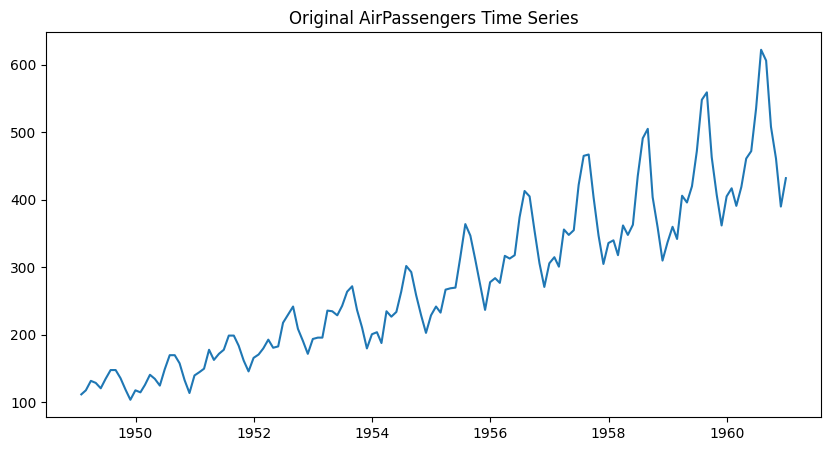

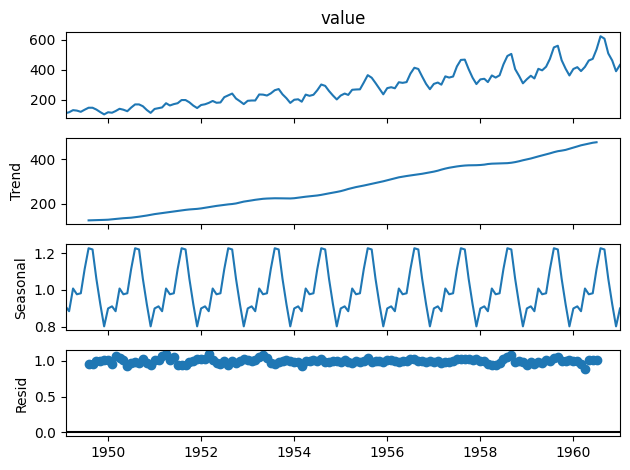

In [7]:
#Question 6: Load a time series dataset (AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.
# Install required library
!pip install statsmodels

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset
data = sm.datasets.get_rdataset("AirPassengers").data

# Convert to datetime index
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

ts = data['value']

# Plot original series
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.title("Original AirPassengers Time Series")
plt.show()

# Decompose series
decomposition = seasonal_decompose(ts, model='multiplicative')

decomposition.plot()
plt.show()

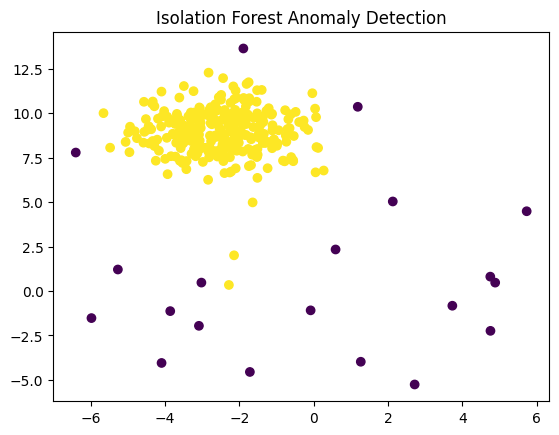

In [5]:
#Question 7: Apply Isolation Forest on a numerical dataset to detect anomalies and visualize them.
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.2, random_state=42)

outliers = np.random.uniform(low=-6, high=6, size=(20,2))
X = np.vstack([X, outliers])

model = IsolationForest(contamination=0.06)
labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Isolation Forest Anomaly Detection")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


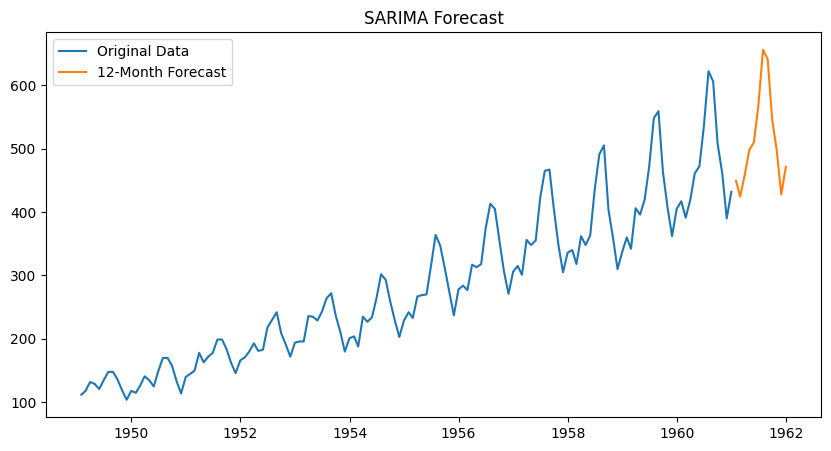

In [8]:
#Question 8: Train a SARIMA model and forecast the next 12 months.
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA model
model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12))

results = model.fit()

# Forecast next 12 months
forecast = results.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(ts, label="Original Data")
plt.plot(forecast, label="12-Month Forecast")
plt.legend()
plt.title("SARIMA Forecast")
plt.show()

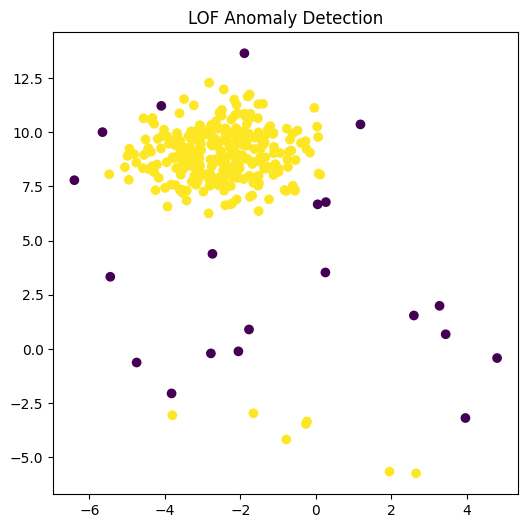

In [9]:
#Question 9: Apply Local Outlier Factor (LOF) and visualize anomalies.
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Create dataset
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.2, random_state=42)

# Add anomalies
outliers = np.random.uniform(low=-6, high=6, size=(20,2))
X = np.vstack([X, outliers])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.06)
labels = lof.fit_predict(X)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("LOF Anomaly Detection")
plt.show()